In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
import math
from skimage.feature import hog
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

## (Freeman) Chain code

In [2]:
D = 10

# DY, DX
FREEMAN = [(0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]
DX = np.array([1, 1, 0, -1, -1, -1, 0, 1])
DY = np.array([0, -1, -1, -1, 0, 1, 1, 1])

freeman_code = np.array([3, 3, 3, 3, 6, 6, 6, 6, 0, 0, 0, 0])
image = np.zeros((D, D), int)

y0,x0 = 5,5
image[y0,x0] = 1

dx = DX[freeman_code]
dy = DY[freeman_code]

xs = np.cumsum(dx)+x0
ys = np.cumsum(dy)+y0

print(xs)
print(ys)

image[ys][xs] = 1

print("freeman_code")
print(freeman_code)
print("image")
print(image)

[4 3 2 1 1 1 1 1 2 3 4 5]
[4 3 2 1 2 3 4 5 5 5 5 5]
freeman_code
[3 3 3 3 6 6 6 6 0 0 0 0]
image
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


## Histogram Oriented Gardiant (HOG)

(338, 338, 3)


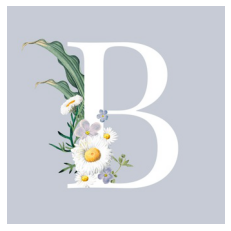

In [3]:
img = imread('b.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256, 3)


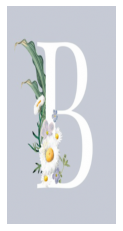

In [4]:
#Resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

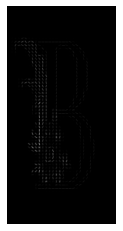

In [5]:
#Creating and visualizing HOG Features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

## Local Binary Pattern (LBP)

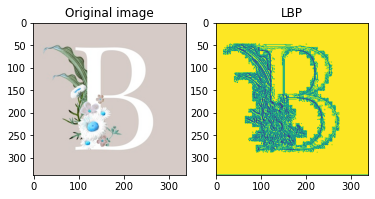

In [6]:
import cv2

def get_pixel(img, center, x, y):
    new_value = 0

    try:
        if img[x][y] >= center:
            new_value =1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    # top_left
    val_ar.append(get_pixel(img, center, x - 1, y - 1))
    # top
    val_ar.append(get_pixel(img, center, x - 1, y))
    # top_right
    val_ar.append(get_pixel(img, center, x - 1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y - 1))
    # left
    val_ar.append(get_pixel(img, center, x, y - 1))

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0

    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]

    return val


path = 'b.jpg'
img_bgr = cv2.imread(path, 1)

height, width, _ = img_bgr.shape

img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width),np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)


plt.subplot(121),plt.imshow(img_bgr),plt.title('Original image')
plt.subplot(122),plt.imshow(img_lbp),plt.title('LBP')
plt.show()

## Skeleton


(<AxesSubplot:title={'center':'skeletonized image'}>,
 Text(0.5, 1.0, 'skeletonized image'))

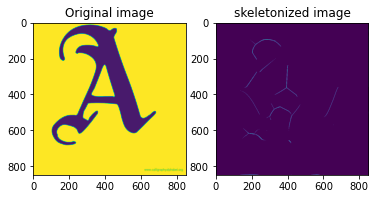

In [7]:
img = cv2.imread('A.jpg',0)
plt.subplot(121),plt.imshow(img),plt.title('Original image')
ret,img = cv2.threshold(img, 127, 255, 0)

size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img, open)
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    if cv2.countNonZero(img)==0:
        break
plt.subplot(122),plt.imshow(skel),plt.title('skeletonized image')

## Convex Hull

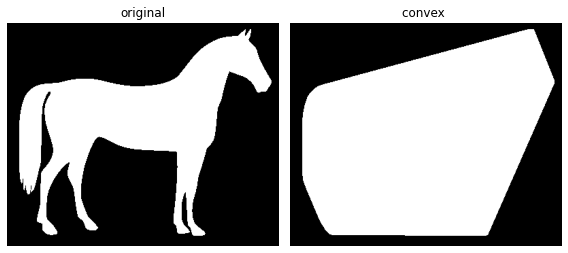

In [8]:
from skimage.morphology import convex_hull_image
from skimage import data,img_as_float
from skimage.util import invert

img = invert(data.horse())

con_hull = convex_hull_image(img)

fig,axes = plt.subplots(1,2,figsize=(8,4))
ax = axes.ravel()

ax[0].set_title('original')
ax[0].imshow(img,cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('convex ')
ax[1].imshow(con_hull,cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

## Bounding Box

In [9]:
import cv2

image = cv2.imread('b.jpg')
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    ROI_number += 1

cv2.imshow('thresh', thresh)
cv2.imshow('copy', copy)
cv2.waitKey()
cv2.destroyAllWindows()